DS location : https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

Documentation : https://archive.ics.uci.edu/ml/datasets/automobile

In [34]:
import pandas as pd
cars = pd.read_csv( "imports-85.data")
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
3              204 non-null int64
?              204 non-null object
alfa-romero    204 non-null object
gas            204 non-null object
std            204 non-null object
two            204 non-null object
convertible    204 non-null object
rwd            204 non-null object
front          204 non-null object
88.60          204 non-null float64
168.80         204 non-null float64
64.10          204 non-null float64
48.80          204 non-null float64
2548           204 non-null int64
dohc           204 non-null object
four           204 non-null object
130            204 non-null int64
mpfi           204 non-null object
3.47           204 non-null object
2.68           204 non-null object
9.00           204 non-null float64
111            204 non-null object
5000           204 non-null object
21             204 non-null int64
27             204 non-null int64
13495          204 n

In [35]:
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


What happened? This is a dataset from 1985 when there was no python and pandas :)
given that the source link has the header info, what should one do? How will you convert

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo


4. fuel-type: diesel, gas.
5. aspiration: std, turbo.

.....

24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

to 
`["symboling","normalized-losses",..."price"]`?

Ans : Paste what you get from that page into a text editor and then pipe through :

`perl -n -e 'print if s/^\d+\.\s*(\S+):.*/$1/;' | perl -p -000 -e 's/(\S+)\s*/"$1",/gs;'`

In [36]:
headers=["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

In [37]:
cars = pd.read_csv( "imports-85.data", names=headers)

In [38]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [39]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

Okay, before we get cut with converting one --> 1, two --> 2, etc for the number of doors and cylinders, let's make sure we don't get caught by things like fourteen and twenty-two :)

In [40]:
cars['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [41]:
cars['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

Okay, we're safe if we go up to twelve :). I just now realize, looking at DQ's accompanying narrative, that you do want to have only letters and numbers and underscores in your header names - that is, no dashes.. and I vaguely remember having written something for that in the past.. 

In this case, since I supplied the names, it's easier to just re-do the names and read-in..

In [42]:
headers = [ x.replace('-','_') for x in headers]
headers

['symboling',
 'normalized_losses',
 'make',
 'fuel_type',
 'aspiration',
 'num_of_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_type',
 'num_of_cylinders',
 'engine_size',
 'fuel_system',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

In [43]:
cars = pd.read_csv( "imports-85.data", names=headers)

Now, let's take care of the num_doors and cylinders :

In [44]:
numbers = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve']
# having written this out, I might as well have written the dict out manually :)
map_nums = { num : numbers.index(num) for num in numbers}
map_nums

{'eight': 8,
 'eleven': 11,
 'five': 5,
 'four': 4,
 'nine': 9,
 'one': 1,
 'seven': 7,
 'six': 6,
 'ten': 10,
 'three': 3,
 'twelve': 12,
 'two': 2,
 'zero': 0}

In [45]:
# okay, then..
cars.replace( {'num_of_doors' : map_nums} , inplace=True)
cars['num_of_doors'].unique()

array([2, 4, '?'], dtype=object)

Okay, bit of a googly there.. How many unknowns do we have?

In [46]:
cars['num_of_doors'].value_counts()

4    114
2     89
?      2
Name: num_of_doors, dtype: int64

You know, I thought that what wasn't in the mapper dictionary would go to NaN.. Didn't so let's redo this with 

In [47]:
cars['num_of_cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num_of_cylinders, dtype: int64

In [48]:
import numpy as np
cars.loc[ cars['num_of_doors'] == '?', 'num_of_doors'] = np.NaN
cars.dropna( axis='index', subset=['num_of_doors'], inplace=True)
cars['num_of_doors'] = cars['num_of_doors'].astype( 'int' )
cars['num_of_doors'].unique()

array([2, 4])

In [49]:
cars.shape

(203, 26)

Phew :)

In [50]:
cars.replace( {'num_of_cylinders' : map_nums} , inplace=True)
cars['num_of_cylinders'] = cars['num_of_cylinders'].astype('int')
cars['num_of_cylinders'].unique()


array([ 4,  6,  5,  3, 12,  2,  8])

In [51]:
cars['normalized_losses'].value_counts()

?      40
161    11
91      8
150     7
128     6
104     6
134     6
168     5
65      5
74      5
103     5
85      5
102     5
94      5
95      5
118     4
106     4
93      4
122     4
154     3
101     3
83      3
115     3
137     3
148     3
125     3
192     2
153     2
129     2
119     2
81      2
108     2
158     2
188     2
164     2
87      2
110     2
89      2
194     2
113     2
197     2
145     2
90      1
231     1
142     1
121     1
256     1
78      1
98      1
77      1
186     1
107     1
Name: normalized_losses, dtype: int64

Okay, they're giving us a choice - replace the ? with an average, or drop it. I say drop the column coz we probably can't use something that we don't know the meaning of anyways..

Since some columns, though not numeric have very few unique values, those should be considered features - for example fuel type, drive_wheels, engine-location. The question is, is SKLearn smart enough to use these as features even if they are strings?
Probably not. The other thing to keep in mind is, since we're using distance, we have to normalize the columns..

Let's start off with a function that tells us (why doesn't something like this exist already?) how many "?" we have in each column

Maybe the right thing to do is to replace all ? with NaN and then count the NaN's..

Another useful function would be the serializer - rwd,fwd,4wd --> 0,1,2 -- you get the idea - make it numeric

Really, (given that one of the columns - engine type has one bad entry called "I", what I'm really looking for is a count of outliers per column 

For each column, get the value counts, now look at a couple of things. First, if the column type is object - meaning, string, 

In [52]:
cars['num_of_doors'].dtypes == np.number

False

In [53]:
data = np.array([10,10,11,12,13,10,11,11,14,14,1,15,19,20,17,17,])
testcase = pd.Series( data )
elems = testcase.tolist()

In [54]:
elems.remove(10)
elems

[10, 11, 12, 13, 10, 11, 11, 14, 14, 1, 15, 19, 20, 17, 17]

In [55]:
{1:2, 2:3} == { 2:3, 1:2}

True

In [56]:
vcs = cars['price'].value_counts()
vcs['?']

4

In [57]:
cars.replace('?', np.NaN, inplace=True )
for col in cars.columns :
    try :
        cars[col] = cars[col].astype( 'float' )
    except :
        pass

In [58]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 26 columns):
symboling            203 non-null float64
normalized_losses    163 non-null float64
make                 203 non-null object
fuel_type            203 non-null object
aspiration           203 non-null object
num_of_doors         203 non-null float64
body_style           203 non-null object
drive_wheels         203 non-null object
engine_location      203 non-null object
wheel_base           203 non-null float64
length               203 non-null float64
width                203 non-null float64
height               203 non-null float64
curb_weight          203 non-null float64
engine_type          203 non-null object
num_of_cylinders     203 non-null float64
engine_size          203 non-null float64
fuel_system          203 non-null object
bore                 199 non-null float64
stroke               199 non-null float64
compression_ratio    203 non-null float64
horsepower           

In [59]:
for col in cars.columns :
    if cars[col].isna( ).value_counts( normalize=True )[False] < 0.95 :
        print( "Dropping Column : {}".format( col ) )
        cars.drop( axis='columns', columns=[col] , inplace=True )
        continue
    else : # drop only the rows
        print( "Dropping rows from {}".format( col ) )
        cars.dropna( axis='index', subset=[col] , inplace=True )

Dropping rows from symboling
Dropping Column : normalized_losses
Dropping rows from make
Dropping rows from fuel_type
Dropping rows from aspiration
Dropping rows from num_of_doors
Dropping rows from body_style
Dropping rows from drive_wheels
Dropping rows from engine_location
Dropping rows from wheel_base
Dropping rows from length
Dropping rows from width
Dropping rows from height
Dropping rows from curb_weight
Dropping rows from engine_type
Dropping rows from num_of_cylinders
Dropping rows from engine_size
Dropping rows from fuel_system
Dropping rows from bore
Dropping rows from stroke
Dropping rows from compression_ratio
Dropping rows from horsepower
Dropping rows from peak_rpm
Dropping rows from city_mpg
Dropping rows from highway_mpg
Dropping rows from price


In [60]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 25 columns):
symboling            193 non-null float64
make                 193 non-null object
fuel_type            193 non-null object
aspiration           193 non-null object
num_of_doors         193 non-null float64
body_style           193 non-null object
drive_wheels         193 non-null object
engine_location      193 non-null object
wheel_base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb_weight          193 non-null float64
engine_type          193 non-null object
num_of_cylinders     193 non-null float64
engine_size          193 non-null float64
fuel_system          193 non-null object
bore                 193 non-null float64
stroke               193 non-null float64
compression_ratio    193 non-null float64
horsepower           193 non-null float64
peak_rpm             

In [28]:
ncars = cars.copy()
for col in ncars.columns :
    if not pd.api.types.is_numeric_dtype( ncars[col].dtypes ) :
        ncars.drop( axis='columns', columns=[col] , inplace=True )
ncars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 17 columns):
symboling            193 non-null float64
num_of_doors         193 non-null float64
wheel_base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb_weight          193 non-null float64
num_of_cylinders     193 non-null float64
engine_size          193 non-null float64
bore                 193 non-null float64
stroke               193 non-null float64
compression_ratio    193 non-null float64
horsepower           193 non-null float64
peak_rpm             193 non-null float64
city_mpg             193 non-null float64
highway_mpg          193 non-null float64
price                193 non-null float64
dtypes: float64(17)
memory usage: 27.1 KB


In [29]:
ncars = (ncars - ncars.mean() ) / ncars.std()
ncars.head()

,symboling,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.782215,-1.172839,-1.678015,-0.442872,-0.839080,-2.117092,-0.025646,-0.410180,0.045098,0.511697,-1.803495,-0.287525,0.198054,-0.212806,-0.677292,-0.555613,0.025958
1,1.782215,-1.172839,-1.678015,-0.442872,-0.839080,-2.117092,-0.025646,-0.410180,0.045098,0.511697,-1.803495,-0.287525,0.198054,-0.212806,-0.677292,-0.555613,0.397446
2,0.163544,-1.172839,-0.719041,-0.250543,-0.184200,-0.613816,0.496473,1.544506,0.574066,-2.388614,0.701095,-0.287525,1.330822,-0.212806,-0.990387,-0.702307,0.397446
3,0.972880,0.848214,0.142410,0.182198,0.143240,0.179580,-0.426254,-0.410180,-0.459826,-0.516262,0.479169,-0.036110,-0.039037,0.853987,-0.207649,-0.115531,0.082206
4,0.972880,0.848214,0.077395,0.182198,0.236794,0.179580,0.498371,0.567163,0.189362,-0.516262,0.479169,-0.538940,0.303427,0.853987,-1.146935,-1.289083,0.514888


In [63]:
from sklearn.neighbors import KNeighborsRegressor       # scikit learn machine learning python toolkit
from sklearn.metrics import mean_squared_error  # scikit learn
from sklearn.model_selection import cross_val_score, KFold  # scikit learn

In [68]:
def knn_train_test( df, train_col, target_col, k=5 ) :
    """ dataframe, string, string --> float"""
    N_split = int( len( df ) * 0.8 )
    train_df = df[ : N_split ]
    test_df = df[ N_split : ]
    knn = KNeighborsRegressor( n_neighbors=k )
    knn.fit( train_df[[train_col]], train_df[target_col] )
    predictions = knn.predict( test_df[[train_col]] )
    mse = mean_squared_error( test_df[target_col], predictions )
    return mse**0.5

In [69]:
ncols = list( ncars.columns )
ncols.remove( 'price')
for col in ncols :
    print( "Column {}, RMSE : {}".format( col, knn_train_test( ncars, col, 'price')))
    

Column symboling, RMSE : 1.0700244223066775
Column num_of_doors, RMSE : 0.701868566624623
Column wheel_base, RMSE : 0.8079597777125228
Column length, RMSE : 0.790698250158832
Column width, RMSE : 0.4416908438547102
Column height, RMSE : 0.7978417499812643
Column curb_weight, RMSE : 0.2792334578024877
Column num_of_cylinders, RMSE : 0.5085222201744911
Column engine_size, RMSE : 0.47372067492569675
Column bore, RMSE : 0.9585299139302845
Column stroke, RMSE : 1.0034476090748576
Column compression_ratio, RMSE : 0.6100059211892948
Column horsepower, RMSE : 0.5463033812482261
Column peak_rpm, RMSE : 0.9465885129449303
Column city_mpg, RMSE : 0.47027656237385784
Column highway_mpg, RMSE : 0.34393339169356846


In [52]:
for col in ncols  :
    print( "Column {} to price : {}".format(col, ncars['price'].corr( ncars[col]) ) )

Column symboling to price : -0.08483538319906123
Column num_of_doors to price : 0.04646042105062982
Column wheel_base to price : 0.5849506223058162
Column length to price : 0.6959279144435726
Column width to price : 0.7546488948382368
Column height to price : 0.13623381350738986
Column curb_weight to price : 0.8353677536262232
Column num_of_cylinders to price : 0.7460069395538497
Column engine_size to price : 0.8887784953105814
Column bore to price : 0.5462952748017493
Column stroke to price : 0.09600668351356277
Column compression_ratio to price : 0.07448261617230939
Column horsepower to price : 0.8124532046013468
Column peak_rpm to price : -0.1038353120701144
Column city_mpg to price : -0.7066179934987955
Column highway_mpg to price : -0.7191776883830876


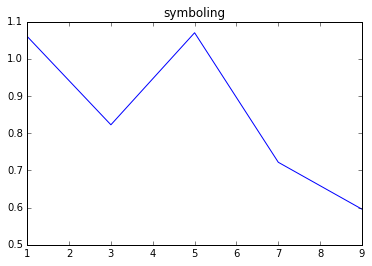

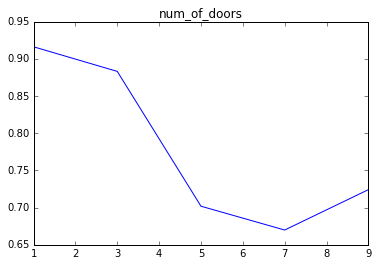

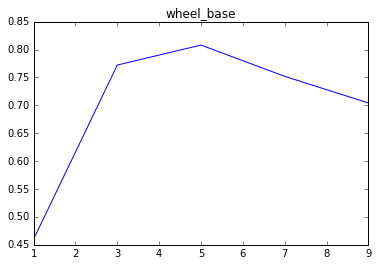

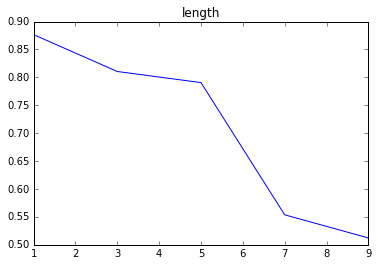

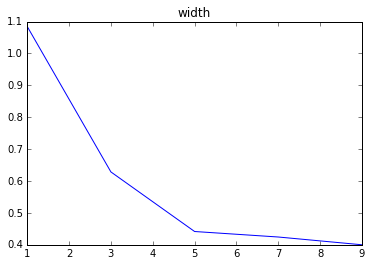

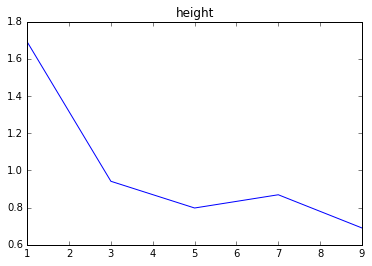

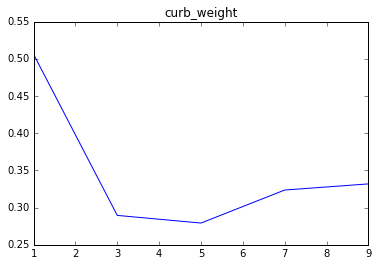

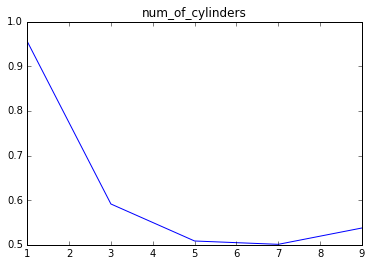

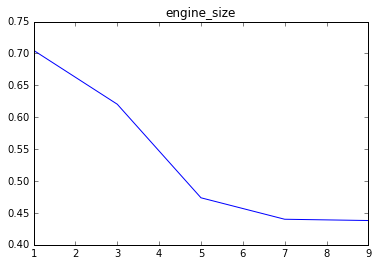

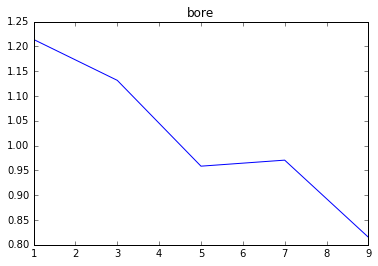

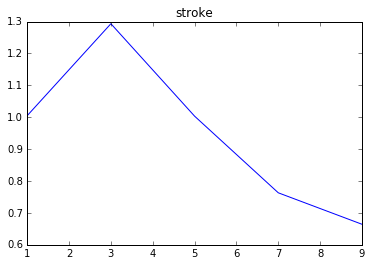

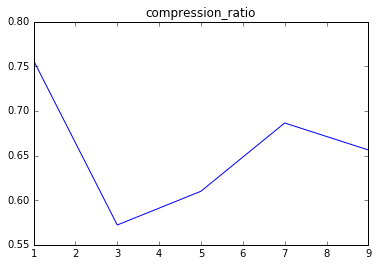

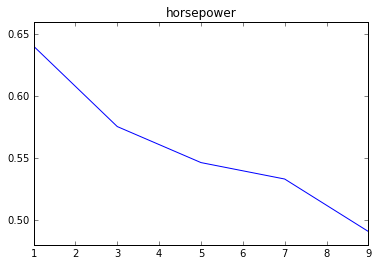

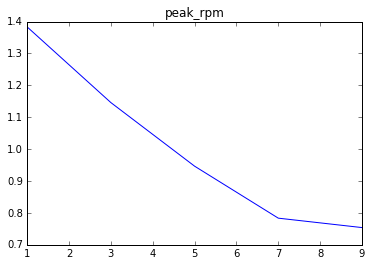

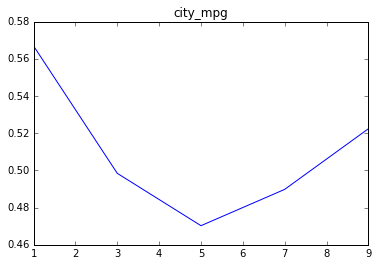

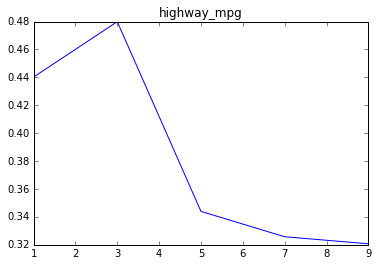

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

k_vals = list( range( 1,10,2 ) )
for col in ncols :
    rmses = []
    for k in k_vals :
        rmses.append( knn_train_test( ncars, col, 'price' , k) )
    plt.plot( k_vals, rmses, color='blue' )
    plt.title( col )
    plt.show()

Univariate : 

| Column            | RMSE        |
| ----------------- | ----------- |
| curb_weight       | 0.279233458 |
| highway_mpg       | 0.343933392 |
| width             | 0.441690844 |
| city_mpg          | 0.470276562 |
| engine_size       | 0.473720675 |
| num_of_cylinders  | 0.50852222  |
| horsepower        | 0.546303381 |
| compression_ratio | 0.610005921 |
| num_of_doors      | 0.701868567 |
| length            | 0.79069825  |
| height            | 0.79784175  |
| wheel_base        | 0.807959778 |
| peak_rpm          | 0.946588513 |
| bore              | 0.958529914 |
| stroke            | 1.003447609 |
| symboling         | 1.070024422 |

thanks : https://csvtomd.com/#/

In [72]:
# now we start using multiple columns :
def knn_train_test( df, train_cols, target_col, k=5 ) :
    """ dataframe, string, string, int --> float"""
    N_split = int( len( df ) * 0.8 )
    train_df = df[ : N_split ]
    test_df = df[ N_split : ]
    knn = KNeighborsRegressor( n_neighbors=k )
    knn.fit( train_df[ train_cols ], train_df[target_col] )
    predictions = knn.predict( test_df[ train_cols ] )
    mse = mean_squared_error( test_df[target_col], predictions )
    return mse**0.5

In [74]:
# Now, use two best - curb_weight and highway_mpg with k=5 (default) :
rmse = knn_train_test( ncars, ['curb_weight', 'highway_mpg'], 'price' , k)
rmse

0.34529730427956995

Nice. How do you make sense of that? Take the two best features and, together, they give you something worse than either one by itself..

In [75]:
# Now the three best : curb_weight, highway_mpg and width
rmse = knn_train_test( ncars, ['curb_weight', 'highway_mpg', 'width'], 'price' , k)
rmse

0.3040400273579191

In [76]:
# now with top four : adding city_mpg
rmse = knn_train_test( ncars, ['curb_weight', 'highway_mpg', 'width', 'city_mpg'], 'price' , k)
rmse

0.28037506732354867

Great, and still no better than curb_weight by itself..

In [77]:
# top five :
rmse = knn_train_test( ncars, ['curb_weight', 'highway_mpg', 'width', 'city_mpg', 'engine_size'], 'price' , k)
rmse

0.2992133900213522

In [78]:
# For top three models : ie : curb_weight solo, curb,hwy_mpg, width, city_mpg and those plus engine_size, 
# vary k from 1 to 25 - hyperparameter tuning and find the best k value for each

m1_cols = ['curb_weight']
m2_cols = ['curb_weight', 'highway_mpg', 'width', 'city_mpg']
m3_cols = ['curb_weight', 'highway_mpg', 'width', 'city_mpg', 'engine_size']

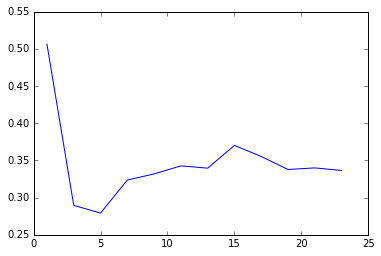

In [79]:
rmses = []
k_vals = list( range(1,25,2))
for k in k_vals :
    rmses.append( knn_train_test( ncars, m1_cols, 'price' , k) )
plt.plot( k_vals, rmses, color='blue' )
plt.show()

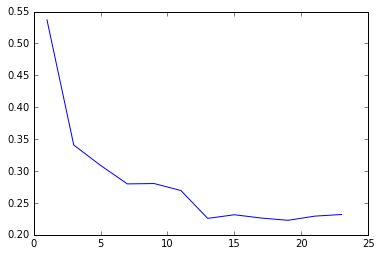

In [80]:
rmses = []
k_vals = list( range(1,25,2))
for k in k_vals :
    rmses.append( knn_train_test( ncars, m2_cols, 'price' , k) )
plt.plot( k_vals, rmses, color='blue' )
plt.show()

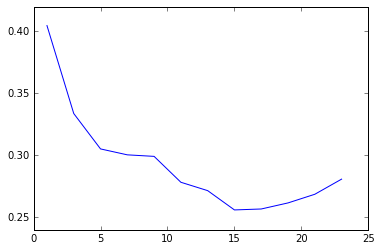

In [81]:
rmses = []
k_vals = list( range(1,25,2))
for k in k_vals :
    rmses.append( knn_train_test( ncars, m3_cols, 'price' , k) )
plt.plot( k_vals, rmses, color='blue' )
plt.show()

only curb_weight  : 0.28 with K=5
'curb_weight', 'highway_mpg', 'width', 'city_mpg' : 0.22 with K=18
'curb_weight', 'highway_mpg', 'width', 'city_mpg', 'engine_size' : 0.26 with K= 15

What accounts for the different K values that are optimal with different feature sets? Hmmm..


Now, using library functions to do k-fold cross validation :

In [82]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor

In [85]:
# now we start using multiple columns :
def knn_train_test( df, train_cols, target_col, k=5, kfold=False ) :
    """ dataframe, string, string, int, bool --> float"""
    # if you specify kfold=True, then, instead of 80/20 single split, full-fledged k-fold 
    # cross validation will be used to generate the averge RMSE value
    if not kfold :
        N_split = int( len( df ) * 0.8 )
        train_df = df[ : N_split ]
        test_df = df[ N_split : ]
        knn = KNeighborsRegressor( n_neighbors=k )
        knn.fit( train_df[ train_cols ], train_df[target_col] )
        predictions = knn.predict( test_df[ train_cols ] )
        mse = mean_squared_error( test_df[target_col], predictions )
        return mse**0.5
    else :
        kf = KFold( 5 , shuffle=True, random_state=1 )
        knn = KNeighborsRegressor( n_neighbors=k )
        mses = cross_val_score(knn , df[train_cols], df[target_col], scoring='neg_mean_squared_error' , cv=kf)
        rmses = [ (abs(x))**0.5 for x in mses]
        avg_rmse = np.mean( rmses )
        return avg_rmse

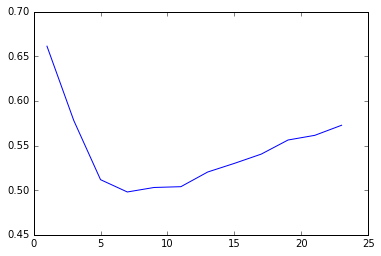

In [86]:
rmses = []
k_vals = list( range(1,25,2))
for k in k_vals :
    rmses.append( knn_train_test( ncars, m1_cols, 'price' , k, kfold=True) )
plt.plot( k_vals, rmses, color='blue' )
plt.show()

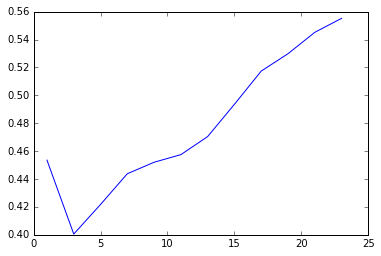

In [87]:
rmses = []
k_vals = list( range(1,25,2))
for k in k_vals :
    rmses.append( knn_train_test( ncars, m2_cols, 'price' , k, kfold=True) )
plt.plot( k_vals, rmses, color='blue' )
plt.show()

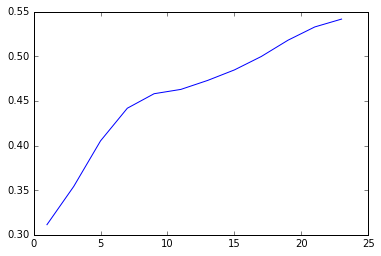

In [88]:
rmses = []
k_vals = list( range(1,25,2))
for k in k_vals :
    rmses.append( knn_train_test( ncars, m3_cols, 'price' , k, kfold=True) )
plt.plot( k_vals, rmses, color='blue' )
plt.show()